### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
path = r'/Users/ajahanderson/Documents/Book Data'

In [5]:
df = pd.read_csv(os.path.join(path,'2 Data','Prepared Data','book_dataset_cleaned.csv'),index_col = False)

### 2. Data cleaning

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Date', 'Time', 'Qtr', 'Special Day',
       'Online Sale Offers', 'Day of week', 'Gender', 'Customer ID',
       'Product-Name', 'Item-Status', 'Quantity', 'Item Price',
       'Shipping-Price', 'Ship-City', 'Ship-State', 'Ship-Postal-Code',
       'Category', 'Total', 'Author', 'Publication', 'Profit %',
       'Profit (INR)', 'Cost Price'],
      dtype='object')

In [7]:
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df = df.drop(columns = ['Item-Status'])

In [9]:
df.head()

,ID,Date,Time,Qtr,Special Day,Online Sale Offers,Day of week,Gender,Customer ID,Product-Name,...,Ship-City,Ship-State,Ship-Postal-Code,Category,Total,Author,Publication,Profit %,Profit (INR),Cost Price
0,1,2018-01-01,08:57:00,1,1,1,1,F,B07FWXWZT,Database System Concepts (Int'l Ed),...,Hyderabad,Telangana,500073,College,1084.0,Avi Silberschatz,Mcgraw-Hill,13,129.87,869.13
1,2,2018-01-02,02:04:00,1,1,1,2,M,B07FWVXXU,ESE 2020 Mains Examination: Electrical Enginee...,...,Dharmapuri,Tamil Nadu,636701,Competition,725.0,Team Of Engineers Academy,Engineers Academy Publication,17,108.80,531.20
2,3,2018-01-03,05:08:00,1,1,1,3,M,B07FWVXZS,Objective Type Pharmacy,...,Guwahati,Assam,781024,Competition,800.0,Dr. Mohammed Ali,Bhuteraenterprises,17,121.55,593.45
3,4,2018-01-04,16:06:00,1,0,1,4,F,B07FWYXVQ,A Text Book of Optics,...,Palani,Tamil Nadu,624601,College,650.0,N Subrahmanyam,S. Chand Publishing,13,73.45,491.55
4,5,2018-01-04,20:12:00,1,0,0,4,F,B07FWXATQ,Surveying - Vol. 2,...,Patna,Bihar,800013,College,579.0,Duggal,Mcgraw Hill Education,13,64.22,429.78


In [10]:
df.shape

(3440, 23)

In [11]:
# Check for missing values

df.isnull().sum()

ID                    0
Date                  0
Time                  0
Qtr                   0
Special Day           0
Online Sale Offers    0
Day of week           0
Gender                0
Customer ID           0
Product-Name          0
Quantity              0
Item Price            0
Shipping-Price        0
Ship-City             0
Ship-State            0
Ship-Postal-Code      0
Category              0
Total                 0
Author                0
Publication           0
Profit %              0
Profit (INR)          0
Cost Price            0
dtype: int64

In [12]:
dups = df.duplicated()

In [13]:
dups.shape

(3440,)

In [14]:
df = df[df['Total'] < 1600]

/var/folders/5t/s295bnhn7bvf1407s3py_b8h0000gn/T/ipykernel_63594/2916291970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total'], bins=25)
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

<Axes: xlabel='Total', ylabel='Density'>

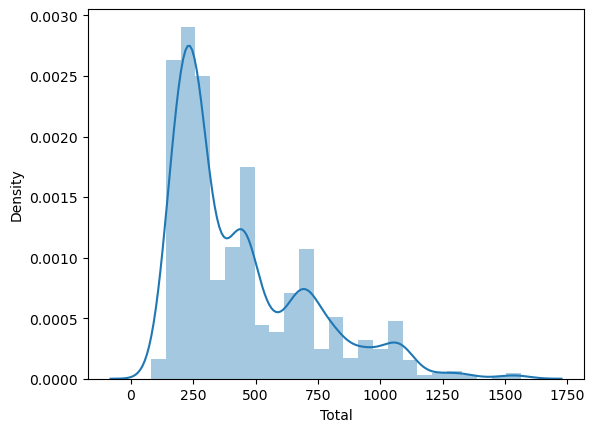

In [15]:
sns.distplot(df['Total'], bins=25)

In [16]:
df['Total'].mean()

437.7931715116279

In [17]:
df['Total'].median()

335.0

In [18]:
df['Total'].max()

1565.0

### 3. Data prep for regression analysis 

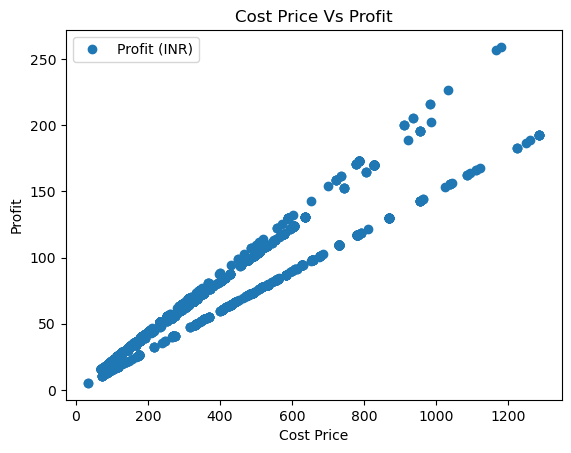

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Cost Price', y='Profit (INR)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cost Price Vs Profit')  
plt.xlabel('Cost Price')  
plt.ylabel('Profit')  
plt.show()

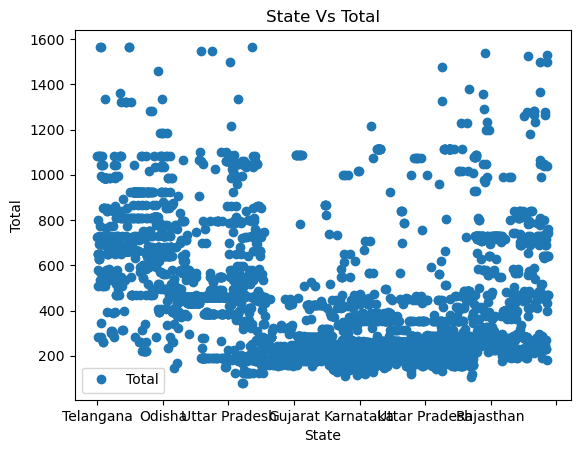

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Ship-State', y='Total',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('State Vs Total')  
plt.xlabel('State')  
plt.ylabel('Total')  
plt.show()

In [21]:
result = df.groupby(['Gender', 'Category'])['Total'].sum().reset_index()

In [22]:
result

,Gender,Category,Total
0,F,College,236252.00
1,F,Competition,228029.72
2,F,School,247789.55
3,M,College,251619.50
4,M,Competition,261106.67
5,M,School,281211.07


In [23]:
results = df.groupby('Category')['Total'].sum().reset_index()

In [24]:
results

,Category,Total
0,College,487871.50
1,Competition,489136.39
2,School,529000.62


/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ajahanderson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

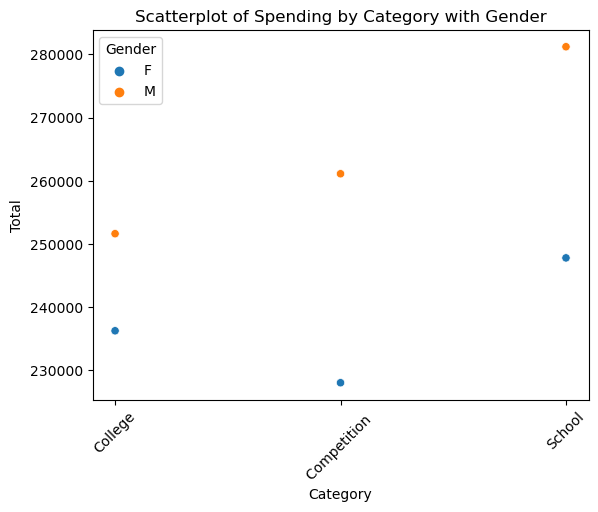

In [25]:
sns.scatterplot(x='Category', y='Total', hue='Gender', data=result)
plt.title('Scatterplot of Spending by Category with Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Gender')  # Add legend with gender labels
plt.show()

## Hypothesis


1.There is variability in purchase behavior across different cities or states, impacting the total sales volume.

2.There exists a correlation between the cost price of items and the generated profit, influencing profit margins.

3.There is a difference in purchasing behavior between genders, reflected in the choice of product categories or authors.`

In [26]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df[['Cost Price', 'Item Price','Shipping-Price']]
y = df['Profit (INR)']

In [27]:
Y = df['Profit (INR)']

In [28]:
X

,Cost Price,Item Price,Shipping-Price
0,869.13,999.0,85.0
1,531.20,640.0,85.0
2,593.45,715.0,85.0
3,491.55,565.0,85.0
4,429.78,494.0,85.0
...,...,...,...
3435,329.73,379.0,89.0
3436,543.65,655.0,89.0
3437,459.82,554.0,89.0
3438,329.73,379.0,89.0


In [29]:
y

0       129.87
1       108.80
2       121.55
3        73.45
4        64.22
         ...  
3435     49.27
3436    111.35
3437     94.18
3438     49.27
3439     88.79
Name: Profit (INR), Length: 3440, dtype: float64

In [30]:
## Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### 4. Regression analysis

In [31]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

In [34]:
Y_pred = model.predict(X_test)

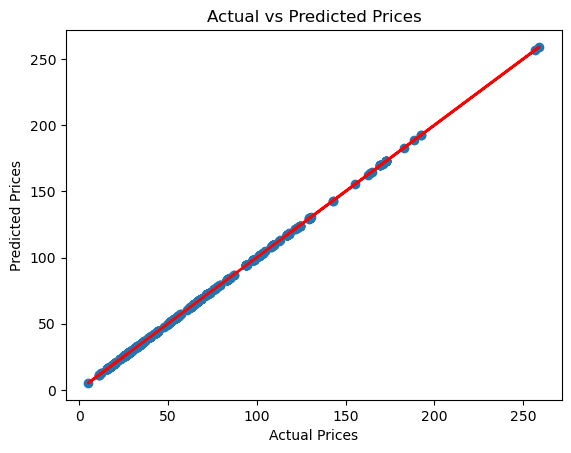

In [37]:
plt.scatter(y_test, Y_pred)
plt.plot(y_test, Y_pred, color='red', linewidth=2) 
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [38]:
rmse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)


In [39]:
print('Slope:' , model)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: LinearRegression()
Mean squared error:  1.682733655554869e-25
R2 score:  1.0


### Test Set

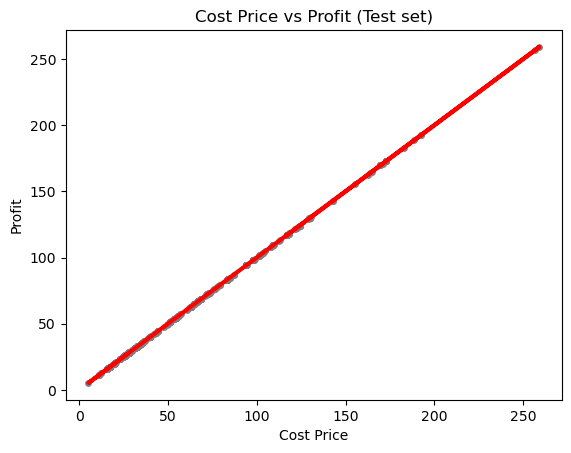

In [62]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(y_test, Y_pred, color='gray', s = 15)
plot_test.plot(y_test, Y_pred, color='red', linewidth =3)
plot_test.title('Cost Price vs Profit (Test set)')
plot_test.xlabel('Cost Price')
plot_test.ylabel('Profit')
plot_test.show()

In [68]:
rmse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

In [70]:
print('Slope:' , model)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: LinearRegression()
Mean squared error:  1.682733655554869e-25
R2 score:  1.0
